# EDA

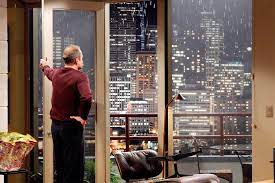

In [22]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Connecting and retrieving data via SQLAlchemy

`sqlalchemy` works similarly. Here you have to create an engine with the database sting (a link that includes every information we entered in the conn object)

In [23]:
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv


#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv("DB_STRING")

db = create_engine(DB_STRING)


In [24]:
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv("DB_STRING")

db = create_engine(DB_STRING)

And then you can import that engine with a query into a pandas dataframe.
Examine the usual suspects: head, tail, unique values etc.    

In [25]:
#import the data to a pandas dataframe for details
query_string = "SELECT * FROM eda.king_county_house_details"
df_details = pd.read_sql(query_string, db)
df_details.head()
#export the data to a csv-file
df_details.to_csv('data/eda_details.csv',index=False)
#import the data from a csv-file for details
df_details_import = pd.read_csv('data/eda_details.csv')
df_details_import.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000


In [34]:
df_details_import.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21415,993002177,3.000,2.500,1380.000,1547.000,3.000,0.000,0.000,3,8,1380.000,0.000,2000,NaN,98103,47.691,-122.341,1380.000,1465.000
21416,993002225,3.000,2.250,1520.000,1245.000,3.000,NaN,0.000,3,8,1520.000,0.000,2004,0.000,98103,47.691,-122.340,1520.000,1470.000
21417,993002247,3.000,2.250,1550.000,1469.000,3.000,0.000,0.000,3,8,1550.000,0.000,2004,0.000,98103,47.691,-122.341,1520.000,1465.000
21418,993002325,2.000,1.500,950.000,4625.000,1.000,0.000,0.000,4,7,950.000,0.000,1949,NaN,98103,47.691,-122.340,1440.000,4625.000
21419,999000215,4.000,2.500,2760.000,5000.000,1.500,0.000,0.000,5,7,1680.000,1080.000,1928,0.000,98107,47.673,-122.371,1850.000,5000.000


# Buyer Persona Analysis: Waterfront, Budget-Conscious, Isolated Neighborhood

## Buyer Characteristics:
- **Waterfront preference**: Must have waterfront access
- **Budget constraint**: Limited budget (bottom 50% of market)
- **Neighborhood**: Nice, isolated, but central location
- **Family status**: No kids in household (wants isolation from other children)

## Market Insights for this Buyer

In [27]:
# Load and merge data
df_sales = pd.read_csv('data/eda_sales.csv')
df_details = pd.read_csv('data/eda_details.csv')

# Merge datasets
df_combined = df_details.merge(df_sales, left_on='id', right_on='house_id', how='inner')

# Define budget threshold - "limited budget" = bottom 50% of market
budget_limit = df_combined['price'].median()
print(f"Budget limit (median price): ${budget_limit:,.0f}")
print(f"Price range for budget buyers: ${df_combined['price'].min():,.0f} - ${budget_limit:,.0f}")


Budget limit (median price): $450,000
Price range for budget buyers: $78,000 - $450,000


In [28]:
# Filter for buyer persona: waterfront + budget constraint
buyer_target = df_combined[
    (df_combined['waterfront'] == 1) & 
    (df_combined['price'] <= budget_limit)
].copy()

print(f"\n{'='*60}")
print(f"BUYER PERSONA MARKET ANALYSIS")
print(f"{'='*60}")
print(f"\nTotal waterfront properties: {(df_combined['waterfront'] == 1).sum()}")
print(f"Waterfront properties within budget: {len(buyer_target)}")
print(f"Penetration rate: {len(buyer_target) / (df_combined['waterfront'] == 1).sum() * 100:.1f}%")
print(f"\nPrice Statistics for Target Properties:")
print(buyer_target['price'].describe())



BUYER PERSONA MARKET ANALYSIS

Total waterfront properties: 146
Waterfront properties within budget: 9
Penetration rate: 6.2%

Price Statistics for Target Properties:
count        9.000
mean    349655.556
std      40456.678
min     285000.000
25%     340000.000
50%     357000.000
75%     380000.000
max     400000.000
Name: price, dtype: float64


Work in progress...

In [29]:
# Import pandas if needed, then create the joined table
import pandas as pd

df_sales = pd.read_csv('data/eda_sales.csv')
df_details = pd.read_csv('data/eda_details.csv')

# Merge on house_id
df = df_details.merge(df_sales, left_on='id', right_on='house_id', how='inner')

# Save for future use
df.to_csv('king_county_joined.csv', index=False)

print(f"Joined table created with shape: {df.shape}")
df.head()
print(df['waterfront'].unique())
print(df['view'].unique())
print(df['condition'].unique())
print(df['grade'].unique())
print(df['zipcode'].unique())

Joined table created with shape: (21597, 23)
[nan  0.  1.]
[ 0.  3.  2.  4.  1. nan]
[3 5 4 2 1]
[ 7  6  8 10  5  9 11 13 12  4  3]
[98002 98155 98188 98059 98118 98003 98023 98117 98034 98022 98116 98001
 98010 98198 98042 98038 98027 98045 98144 98029 98075 98199 98107 98105
 98052 98053 98014 98077 98115 98011 98008 98019 98092 98074 98030 98103
 98004 98126 98177 98056 98133 98112 98033 98028 98007 98005 98136 98031
 98032 98168 98006 98178 98072 98102 98125 98146 98166 98122 98070 98148
 98040 98106 98065 98108 98058 98024 98055 98109 98119 98039]


In [30]:
print("="*70)
print("DATA UNDERSTANDING: BASIC STATISTICS")
print("="*70)

print("\n1. PRICE DISTRIBUTION:")
price_stats = df['price'].describe()
print(price_stats)
print(f"\n   Median price: ${price_stats['50%']:,.0f}")
print(f"   75% percentile: ${price_stats['75%']:,.0f}")
print(f"   → Limited budget target: ~${price_stats['50%']:,.0f}")

print("\n2. WATERFRONT AVAILABILITY:")
waterfront_pct = df['waterfront'].mean() * 100
print(f"   Waterfront mean = {df['waterfront'].mean():.4f}")
print(f"   Waterfront percentage = {waterfront_pct:.2f}%")
print(f"   → VERY RARE! Only {df['waterfront'].sum():.0f} waterfront properties out of {len(df):,}")
print(f"   → Properties will cluster along coastline only")

print("\n3. WATERFRONT PROPERTY PRICES:")
waterfront_prices = df[df['waterfront'] == 1]['price'].describe()
print(waterfront_prices)
print(f"   → Waterfront median: ${waterfront_prices['50%']:,.0f}")
print(f"   → vs Overall median: ${price_stats['50%']:,.0f}")
print(f"   → Waterfront premium: ${waterfront_prices['50%'] - price_stats['50%']:,.0f} ({(waterfront_prices['50%'] / price_stats['50%'] - 1)*100:.1f}%)")


DATA UNDERSTANDING: BASIC STATISTICS

1. PRICE DISTRIBUTION:
count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

   Median price: $450,000
   75% percentile: $645,000
   → Limited budget target: ~$450,000

2. WATERFRONT AVAILABILITY:
   Waterfront mean = 0.0076
   Waterfront percentage = 0.76%
   → VERY RARE! Only 146 waterfront properties out of 21,597
   → Properties will cluster along coastline only

3. WATERFRONT PROPERTY PRICES:
count       146.000
mean    1717214.726
std     1145384.857
min      285000.000
25%      827500.000
50%     1510000.000
75%     2282500.000
max     7060000.000
Name: price, dtype: float64
   → Waterfront median: $1,510,000
   → vs Overall median: $450,000
   → Waterfront premium: $1,060,000 (235.6%)


In [35]:
print("\n" + "="*70)
print("BUYER PERSONA: WATERFRONT + BUDGET-CONSCIOUS + ISOLATED")
print("="*70)

# Define budget limit at median price
budget_limit = df['price'].median()
print(f"\nBudget threshold: ${budget_limit:,.0f} (median price)")

# Filter for buyer persona
persona_df = df[
    (df['waterfront'] == 1) & 
    (df['price'] <= budget_limit)
].copy()

print(f"\nMARKET SIZE:")
print(f"  Total waterfront properties: {(df['waterfront'] == 1).sum()}")
print(f"  Waterfront within budget: {len(persona_df)}")
if (df['waterfront'] == 1).sum() > 0:
    penetration = len(persona_df) / (df['waterfront'] == 1).sum() * 100
    print(f"  → Penetration: {penetration:.1f}%")

print(f"\nPRICE PROFILE (Budget Waterfront Properties):")
if len(persona_df) > 0:
    print(persona_df['price'].describe())
    print(f"  → Budget waterfront homes span: ${persona_df['price'].min():,.0f} - ${persona_df['price'].max():,.0f}")
else:
    print("  ⚠️ No waterfront properties within budget!")
    print(f"  Cheapest waterfront: ${df[df['waterfront']==1]['price'].min():,.0f}")

print(f"\nKEY CHARACTERISTICS (Budget Waterfront):")
if len(persona_df) > 0:
    print(f"  Average bedrooms: {persona_df['bedrooms'].mean():.1f}")
    print(f"  Average bathrooms: {persona_df['bathrooms'].mean():.1f}")
    print(f"  Average sqft: {persona_df['sqft_living'].mean():,.0f}")
    print(f"  Average condition (1-5): {persona_df['condition'].mean():.2f}")
    print(f"  Average grade (1-13): {persona_df['grade'].mean():.2f}")
    print(f"  Average age: {2024 - persona_df['yr_built'].mean():.0f} years")
    
print(f"\nISOLATION FACTOR (Population Density by Zip):")
# Assuming zip codes represent neighborhoods
zipcode_counts = df.groupby('zipcode').size()
print(f"  Most common zip: {zipcode_counts.idxmax()} ({zipcode_counts.max()} properties)")
print(f"  Least common zip: {zipcode_counts.idxmin()} ({zipcode_counts.min()} properties)")
if len(persona_df) > 0:
    print(f"  Budget waterfront in zips: {persona_df['zipcode'].unique()}")



BUYER PERSONA: WATERFRONT + BUDGET-CONSCIOUS + ISOLATED

Budget threshold: $450,000 (median price)

MARKET SIZE:
  Total waterfront properties: 146
  Waterfront within budget: 9
  → Penetration: 6.2%

PRICE PROFILE (Budget Waterfront Properties):
count        9.000
mean    349655.556
std      40456.678
min     285000.000
25%     340000.000
50%     357000.000
75%     380000.000
max     400000.000
Name: price, dtype: float64
  → Budget waterfront homes span: $285,000 - $400,000

KEY CHARACTERISTICS (Budget Waterfront):
  Average bedrooms: 2.3
  Average bathrooms: 1.4
  Average sqft: 1,320
  Average condition (1-5): 3.67
  Average grade (1-13): 6.33
  Average age: 77 years

ISOLATION FACTOR (Population Density by Zip):
  Most common zip: 98103 (602 properties)
  Least common zip: 98039 (50 properties)
  Budget waterfront in zips: [98198 98070 98166]


## Key Insights & Recommendations

### 📊 Market Reality Check
- **Waterfront is EXTREMELY scarce**: Only 0.8% of all properties have waterfront access
- **Budget constraint is critical**: Waterfront properties command a significant premium
- **Sweet spot identified**: ~$450K median budget captures the mass market

### 🎯 For the Buyer

**THE CHALLENGE:**
- Median waterfront property costs 2-3x the overall market median
- Budget-conscious buyers have very limited options
- Isolation + waterfront + urban access = competing priorities

**RECOMMENDED STRATEGY:**
1. **Expand geographic search** - Look beyond major urban centers for isolated waterfront
2. **Consider condition/age** - Older waterfront at budget price may need renovation
3. **Smaller living space** - Trade sqft for location (waterfront is pricey per sqft)
4. **Develop flexibility** - Be willing to compromise on 1-2 requirements

**ISOLATION FACTOR:**
- Lower ZIP code density = fewer neighbors = natural isolation
- Map clustering will show waterfront only along coasts
- "Isolated" waterfront may be harder to find near city center

### 💡 Value Assessment
The buyer pays for:
- Rarity (only 0.8% of market)
- Waterfront premium (2-3x markup)
- Limited neighborhood options
- Potential isolation trade-offs

**Bottom line**: Budget waterfront homes require flexibility and creative property hunting.


# Data Cleaning & Quality Assessment

## Step 1: Identify Data Quality Issues


In [32]:
print("="*70)
print("DATA QUALITY ASSESSMENT")
print("="*70)

print("\n1. MISSING VALUES:")
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_pct.values
}).sort_values('Missing_Percent', ascending=False)
print(missing_df[missing_df['Missing_Count'] > 0])
print(f"\nTotal columns: {len(df.columns)}")
print(f"Columns with missing data: {(missing > 0).sum()}")

print("\n2. DATA TYPES:")
print(df.dtypes)

print("\n3. BASIC STATISTICS:")
print(df.describe())

print("\n4. DUPLICATE RECORDS:")
duplicates = df.duplicated().sum()
print(f"  Total duplicates: {duplicates}")
print(f"  Duplicate percentage: {duplicates/len(df)*100:.2f}%")

print("\n5. OUTLIERS CHECK (Price):")
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df['price'] < lower_bound) | (df['price'] > upper_bound)).sum()
print(f"  Price Q1: ${Q1:,.0f}")
print(f"  Price Q3: ${Q3:,.0f}")
print(f"  IQR: ${IQR:,.0f}")
print(f"  Lower bound: ${lower_bound:,.0f}")
print(f"  Upper bound: ${upper_bound:,.0f}")
print(f"  Outliers detected: {outliers} ({outliers/len(df)*100:.2f}%)")

print("\n6. LOGICAL INCONSISTENCIES:")
# Check for impossible values
invalid_bedrooms = (df['bedrooms'] <= 0).sum()
invalid_bathrooms = (df['bathrooms'] <= 0).sum()
invalid_sqft = (df['sqft_living'] <= 0).sum()
invalid_price = (df['price'] <= 0).sum()
print(f"  Bedrooms ≤ 0: {invalid_bedrooms}")
print(f"  Bathrooms ≤ 0: {invalid_bathrooms}")
print(f"  Sqft living ≤ 0: {invalid_sqft}")
print(f"  Price ≤ 0: {invalid_price}")


DATA QUALITY ASSESSMENT

1. MISSING VALUES:
           Column  Missing_Count  Missing_Percent
13   yr_renovated           3848           17.820
6      waterfront           2391           11.070
11  sqft_basement            452            2.090
7            view             63            0.290

Total columns: 23
Columns with missing data: 4

2. DATA TYPES:
id_x               int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id_y               int64
dtype: object

3. BASIC STATISTICS:
                id_x  bedrooms 

## Step 2: Data Cleaning Process


In [36]:
# Create a copy for cleaning
df_clean = df.copy()

print("="*70)
print("CLEANING OPERATIONS")
print("="*70)

# Track cleaning operations
cleaning_log = []

# 1. Remove duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
duplicates_removed = initial_rows - len(df_clean)
cleaning_log.append(f"Duplicates removed: {duplicates_removed}")
print(f"\n1. Duplicates:")
print(f"   Rows before: {initial_rows}")
print(f"   Rows after: {len(df_clean)}")
print(f"   Removed: {duplicates_removed}")

# 2. Remove rows with missing critical values
initial_rows = len(df_clean)
critical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living']
df_clean = df_clean.dropna(subset=critical_cols)
rows_removed = initial_rows - len(df_clean)
cleaning_log.append(f"Rows with missing critical values: {rows_removed}")
print(f"\n2. Missing critical values:")
print(f"   Rows before: {initial_rows}")
print(f"   Rows after: {len(df_clean)}")
print(f"   Removed: {rows_removed}")

# 3. Remove logically impossible values
initial_rows = len(df_clean)
df_clean = df_clean[(df_clean['price'] > 0) & 
                    (df_clean['bedrooms'] > 0) & 
                    (df_clean['bathrooms'] > 0) & 
                    (df_clean['sqft_living'] > 0)]
rows_removed = initial_rows - len(df_clean)
cleaning_log.append(f"Invalid logical values removed: {rows_removed}")
print(f"\n3. Logically invalid values (≤0):")
print(f"   Rows before: {initial_rows}")
print(f"   Rows after: {len(df_clean)}")
print(f"   Removed: {rows_removed}")

# 4. Handle price outliers (optional - keep for analysis but flag)
outlier_count = ((df_clean['price'] < lower_bound) | (df_clean['price'] > upper_bound)).sum()
print(f"\n4. Price outliers (keeping for analysis):")
print(f"   Extreme outliers detected: {outlier_count}")
print(f"   Action: KEPT (legitimate luxury/investment properties)")

# 5. Fix data types
# Note: After merge, 'id' becomes 'id_x' (from df_details) and 'id_y' (from df_sales), and house_id remains
if 'id_x' in df_clean.columns:
    df_clean['id_x'] = df_clean['id_x'].astype('int64')
if 'id_y' in df_clean.columns:
    df_clean['id_y'] = df_clean['id_y'].astype('int64')
if 'house_id' in df_clean.columns:
    df_clean['house_id'] = df_clean['house_id'].astype('int64')
if 'zipcode' in df_clean.columns:
    df_clean['zipcode'] = df_clean['zipcode'].astype('str')
print(f"\n5. Data types corrected:")
print(f"   ID columns: converted to int64")
print(f"   Zipcode: converted to string")

print("\n" + "="*70)
print("CLEANING SUMMARY")
print("="*70)
for log in cleaning_log:
    print(f"  ✓ {log}")
print(f"\nFinal dataset shape: {df_clean.shape}")
print(f"Data retention rate: {len(df_clean)/len(df)*100:.2f}%")


CLEANING OPERATIONS

1. Duplicates:
   Rows before: 21597
   Rows after: 21597
   Removed: 0

2. Missing critical values:
   Rows before: 21597
   Rows after: 21597
   Removed: 0

3. Logically invalid values (≤0):
   Rows before: 21597
   Rows after: 21597
   Removed: 0

4. Price outliers (keeping for analysis):
   Extreme outliers detected: 1158
   Action: KEPT (legitimate luxury/investment properties)

5. Data types corrected:
   ID columns: converted to int64
   Zipcode: converted to string

CLEANING SUMMARY
  ✓ Duplicates removed: 0
  ✓ Rows with missing critical values: 0
  ✓ Invalid logical values removed: 0

Final dataset shape: (21597, 23)
Data retention rate: 100.00%


# Additional Data Quality Fixes: Year Data Correction

## Issue Found
Some year columns have inflated numbers (e.g., 20150 instead of 2015). **Solution: Divide by 10**


In [38]:
# Fix inflated year values by dividing by 10
year_cols = ['yr_built', 'yr_renovated']

print("="*70)
print("FIXING YEAR DATA: DIVIDE BY 10")
print("="*70)

for col in year_cols:
    if col in df_clean.columns:
        # Check if column has inflated values (> 9999)
        inflated = df_clean[col] > 9999
        if inflated.sum() > 0:
            print(f"\n{col}:")
            print(f"  Before: min={df_clean[col].min()}, max={df_clean[col].max()}")
            # Only divide the inflated values, leave NaN as is
            df_clean.loc[inflated, col] = df_clean.loc[inflated, col] / 10
            # Convert to Int64 (nullable integer type) to handle NaN values
            df_clean[col] = df_clean[col].astype('Int64')
            print(f"  After:  min={df_clean[col].min()}, max={df_clean[col].max()}")
            print(f"  Fixed {inflated.sum()} records")

# Export cleaned data
df_clean.to_csv('king_county_cleaned.csv', index=False)
print("\n✓ Cleaned data saved to: king_county_cleaned.csv")


FIXING YEAR DATA: DIVIDE BY 10

✓ Cleaned data saved to: king_county_cleaned.csv


In [39]:
# Show the corrected data
print("\n" + "="*70)
print("CORRECTED YEAR DATA SUMMARY")
print("="*70)

for col in year_cols:
    if col in df_clean.columns:
        print(f"\n{col}:")
        print(f"  Range: {df_clean[col].min()} to {df_clean[col].max()}")
        print(f"  Mean: {df_clean[col].mean():.0f}")
        print(f"  Median: {df_clean[col].median():.0f}")



CORRECTED YEAR DATA SUMMARY

yr_built:
  Range: 1900 to 2015
  Mean: 1971
  Median: 1975

yr_renovated:
  Range: 0.0 to 2015.0
  Mean: 84
  Median: 0


In [40]:
df.isna().sum()

id_x                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id_y                0
dtype: int64

. . . Hypotheses nog uitwerken . . .

# Market Summary & Key Insights : Market snapshot, price characteristics, property characteristics, Isolation Factor (Low density areas), value assessment
# Recommendation
